In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# pip install split-folders tqdm

In [3]:
#pip install opencv-python

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import splitfolders
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# base_dir = '/content/drive/MyDrive/Capstone/Dataset'
base_dir = './Dataset/'

#### Divide the Train, Validation, Testing folders with a ratio of 7:1:2

In [6]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1523 files [00:04, 305.61 files/s]


#### Adding to each folder for Training, Validation, and Testing

In [7]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(train_dir)

['Abimanyu',
 'Antasena',
 'Bagong',
 'Bima',
 'Gareng',
 'Gatot Kaca',
 'Hanoman',
 'Krisna',
 'Petruk',
 'Semar']

In [8]:
class_names = ['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar']

# Image Augmentation
- Rescale
- Rotation_range
- width_shift_range
- height_shift_range
- brightness_range
- shear_range
- zoom_range
- fill_mode
- horizontal_flip

## NOTE
### because our dataset is less, the augmentation result will be saved as an image and augmentation is only done once.

In [9]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.45, # memutar gambar
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.2), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    # #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    )

# folder_path = 'Augment/Temporary'
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#### Retrieving directories for each augmentation process
##### On Data Train, Validation, Testing
- directory name respectively
- target image that is augmented by 150 x 150
- batch size is the image entered into the step for which 1 step is 32 images entered

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(299,299), # change the resolution of all images to 150*150
    batch_size=64, # to determine the number of images that will be included in the training steps
    shuffle=True,
    class_mode='categorical',
    keep_aspect_ratio=True,
    color_mode='rgb',
    interpolation='bicubic'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(299,299),
    batch_size=64,
    shuffle=True,
    class_mode='categorical',
    keep_aspect_ratio=True,
    color_mode='rgb',
    interpolation='bicubic'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299,299),
    batch_size=64,
    shuffle=True,
    class_mode='categorical',
    keep_aspect_ratio=True,
    color_mode='rgb',
    interpolation='bicubic'
)

Found 1114 images belonging to 10 classes.
Found 170 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


In [11]:
image, label = train_generator.next()

# Visualization

## Pallete for Visualization

In [12]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

## Visualization of the total number of images
- Training data visualization
- Test data visualization
- Validation data visualization

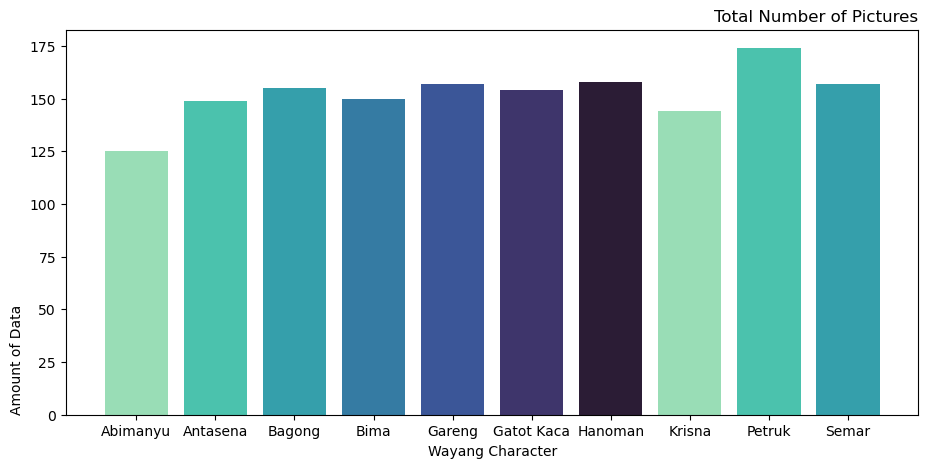

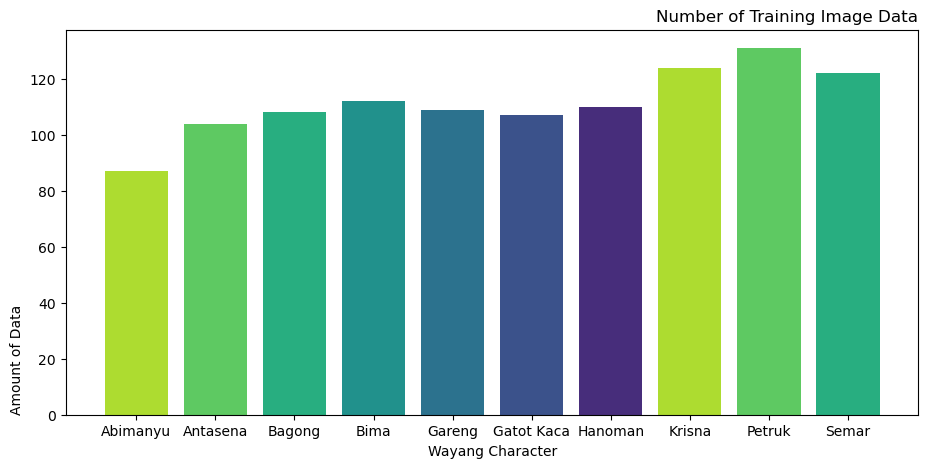

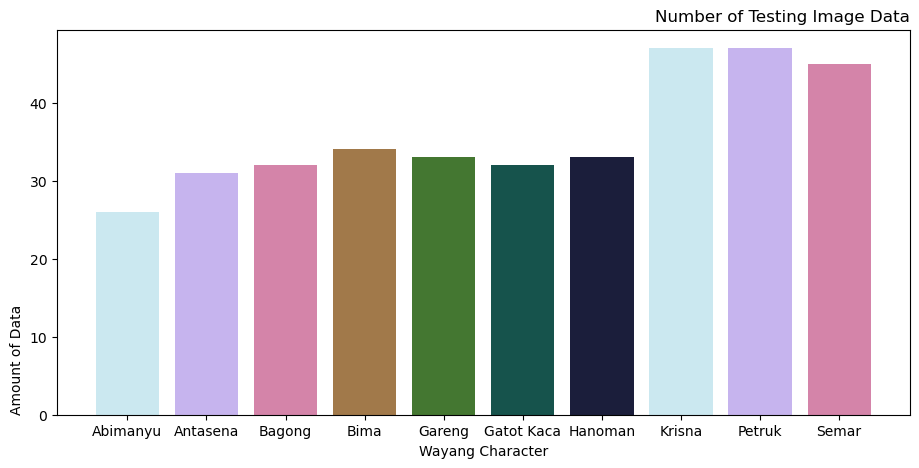

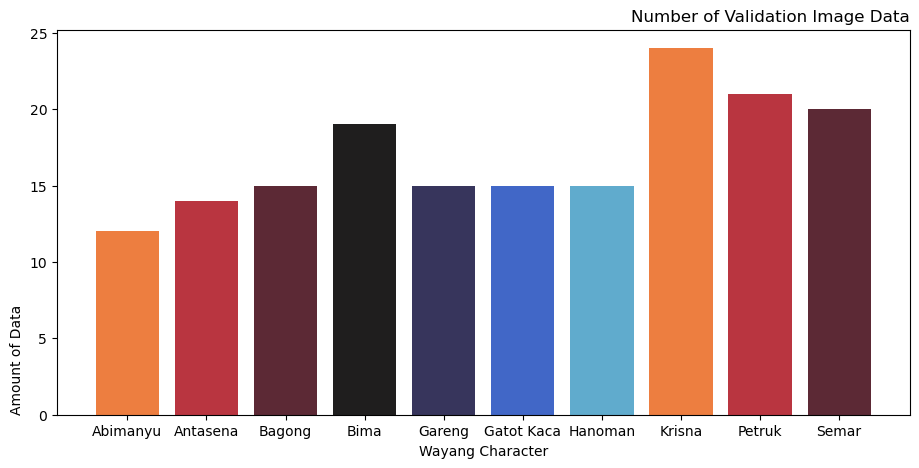

In [13]:
# Visualization of the total number of Images
list_jumlah_file_all = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(base_dir):
    list_file_kelas = os.listdir(os.path.join(base_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_all.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classnames
y = list_jumlah_file_all # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette1)
plt.title('Total Number of Pictures', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data training
list_jumlah_file_train = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(train_dir):
    list_file_kelas = os.listdir(os.path.join(train_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_train.append(banyaknya_file) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_train ## list dari banyaknya jumlah file training yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette2)
plt.title('Number of Training Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data testing
list_jumlah_file_test = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(test_dir):
    list_file_kelas1 = os.listdir(os.path.join(test_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file1 = len(list_file_kelas1)
    list_jumlah_file_test.append(banyaknya_file1) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_test # list dari banyaknya jumlah file validation yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette3)
plt.title('Number of Testing Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data validation
list_jumlah_file_val = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(val_dir):
    list_file_kelas2 = os.listdir(os.path.join(val_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file2 = len(list_file_kelas2)
    list_jumlah_file_val.append(banyaknya_file2) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_val # list dari banyaknya jumlah file testing yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette4)
plt.title('Number of Validation Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

In [14]:
len(image)

64

In [15]:
label

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

#### Visualization of Images feature Edge

In [16]:
def edge_detection(image):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    edges_detected = cv2.Canny(image , 100, 200) 
    title = ["Original Image","Edge Detected Image"]
    images=[image, edges_detected]
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(images[i],cmap='gray')
        plt.title(title[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

Dataset/Abimanyu/0.jpg


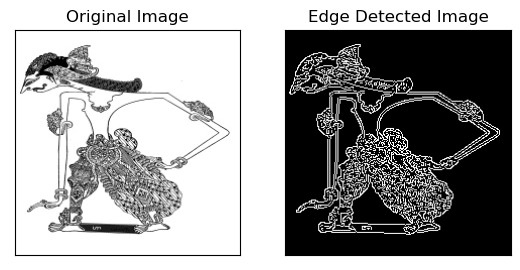

Dataset/Antasena/0.jpg


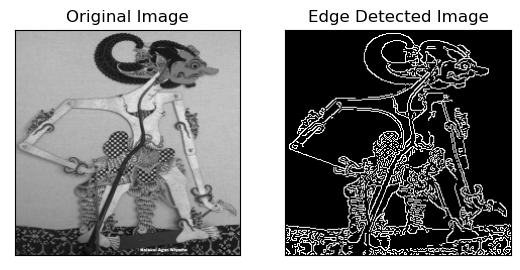

Dataset/Bagong/0.jpg


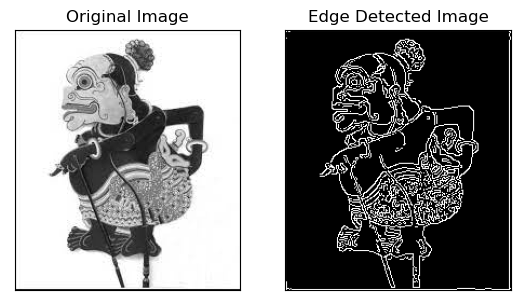

Dataset/Bima/0.jpg


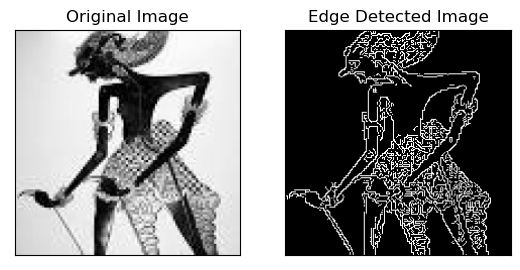

Dataset/Gareng/0.jpg


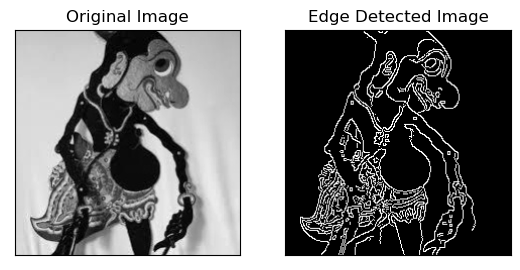

Dataset/Gatot Kaca/0.jpg


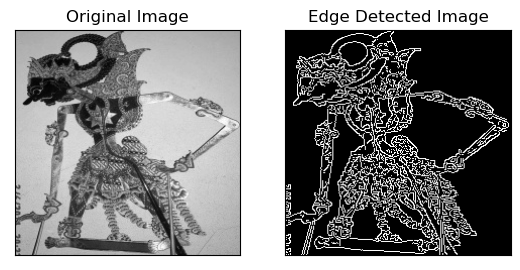

Dataset/Hanoman/0.jpg


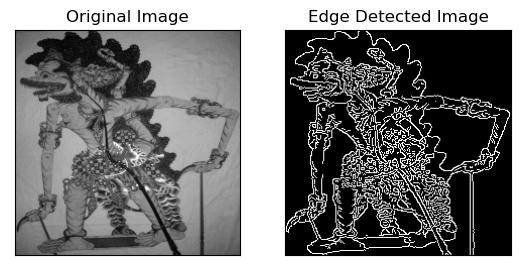

Dataset/Krisna/0.jpg


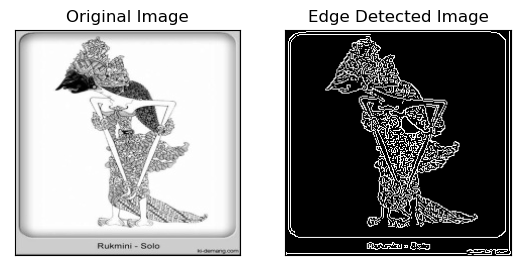

Dataset/Petruk/0.jpg


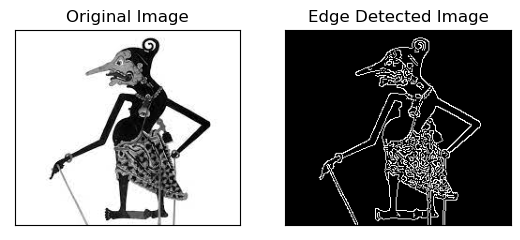

Dataset/Semar/0.jpg


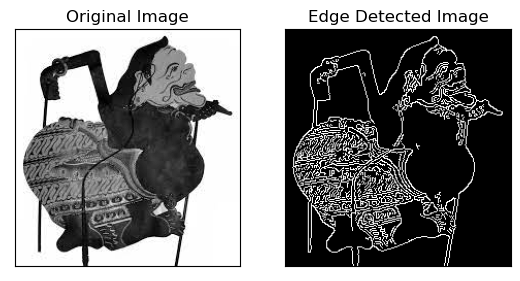

In [17]:
os.listdir(base_dir)
zz = os.listdir(base_dir)
for i in range(len(zz)):
    ss ="%s%s%s" % ('Dataset/', zz[i], "/0.jpg")
    print(ss)
    img = cv2.imread(ss, 0)
    
    edge_detection(img)

#### Visualization of Images Based on Their Label Names
- of all classes a sub plot is created 
- which is in the form of a 3x3 matrix
- not using measurements (axis)

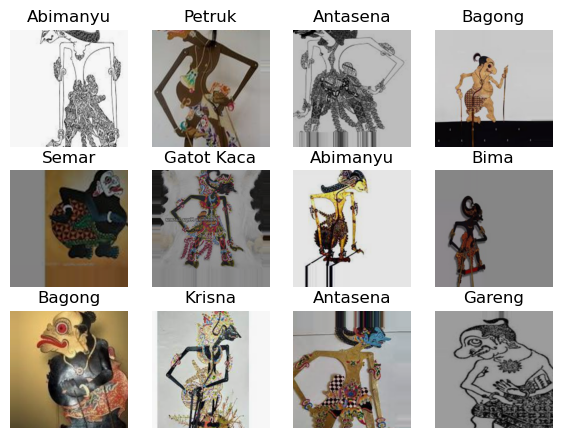

In [18]:
plt.figure(figsize=(7,7))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image[i])
  plt.title(class_names[np.argmax(label[i])])
  plt.axis("off")


#### Image Visualization and Display the size of each image (shape)

Ukuran gambar : (64, 299, 299, 3)


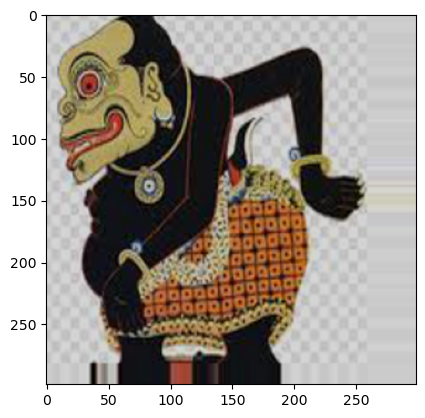

Ukuran gambar : (64, 299, 299, 3)


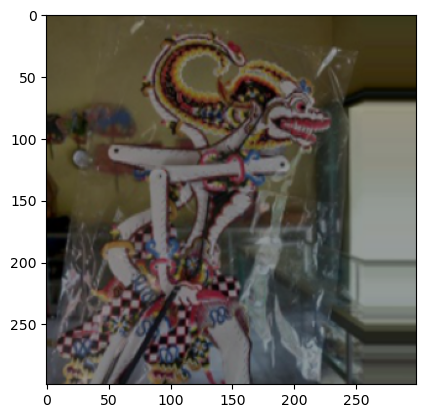

Ukuran gambar : (64, 299, 299, 3)


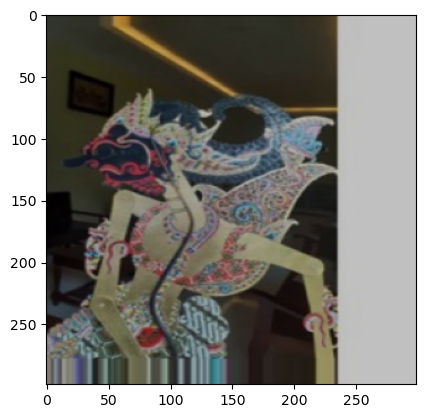

Ukuran gambar : (64, 299, 299, 3)


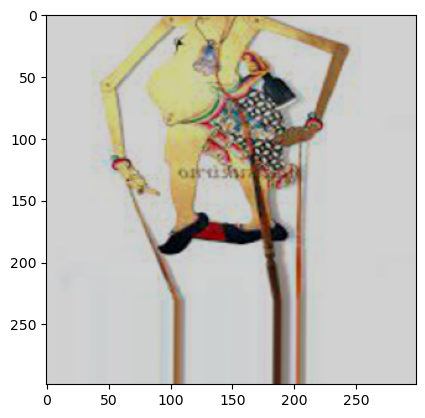

Ukuran gambar : (64, 299, 299, 3)


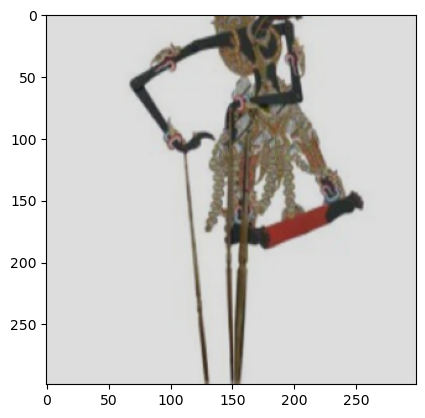

Ukuran gambar : (64, 299, 299, 3)


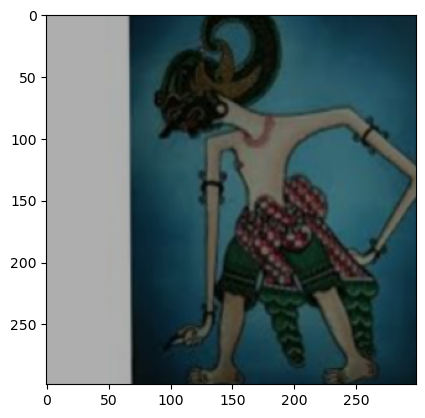

Ukuran gambar : (64, 299, 299, 3)


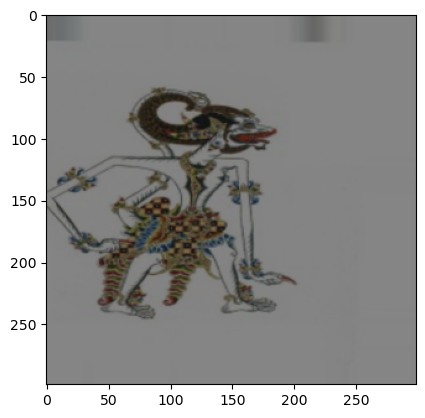

In [19]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [20]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=3)#jadi jika di 3 epoch selanjutnya itu tidak berubah maka diberentikan

# Transfer Learning

## Reduce Learning Rate

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience = 2,
    verbose=1,
    factor=0.3,
    min_lr=0.000001
)

In [22]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(299,299,3))
# base_model.trainable = False

In [23]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(tf.keras.layers.Dense(1024, activation='relu'))
add_model.add(tf.keras.layers.Dense(512, activation='relu'))
add_model.add(Dropout(0.5))      
add_model.add(Dense(10, activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                        

In [24]:
history = model.fit(train_generator, 
                              epochs=20, 
                              shuffle=True, 
                              verbose=True,
                              validation_data=validation_generator,
                              callbacks=[reduce_lr,monitor_val_acc])

Epoch 1/20
18/18 [==============================] - 726s 38s/step - loss: 2.0902 - accuracy: 0.2675 - val_loss: 1.5680 - val_accuracy: 0.5353 - lr: 1.0000e-04
Epoch 2/20
18/18 [==============================] - 631s 35s/step - loss: 1.1052 - accuracy: 0.6930 - val_loss: 0.6771 - val_accuracy: 0.7647 - lr: 1.0000e-04
Epoch 3/20
18/18 [==============================] - 582s 32s/step - loss: 0.4348 - accuracy: 0.8743 - val_loss: 0.5340 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 4/20
18/18 [==============================] - 586s 32s/step - loss: 0.2381 - accuracy: 0.9255 - val_loss: 0.2172 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 5/20
18/18 [==============================] - 579s 32s/step - loss: 0.1464 - accuracy: 0.9533 - val_loss: 0.2014 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 6/20
18/18 [==============================] - 582s 32s/step - loss: 0.1091 - accuracy: 0.9686 - val_loss: 0.1175 - val_accuracy: 0.9529 - lr: 1.0000e-04
Epoch 7/20
18/18 [============================

In [25]:
add_model.save("Model.h5")

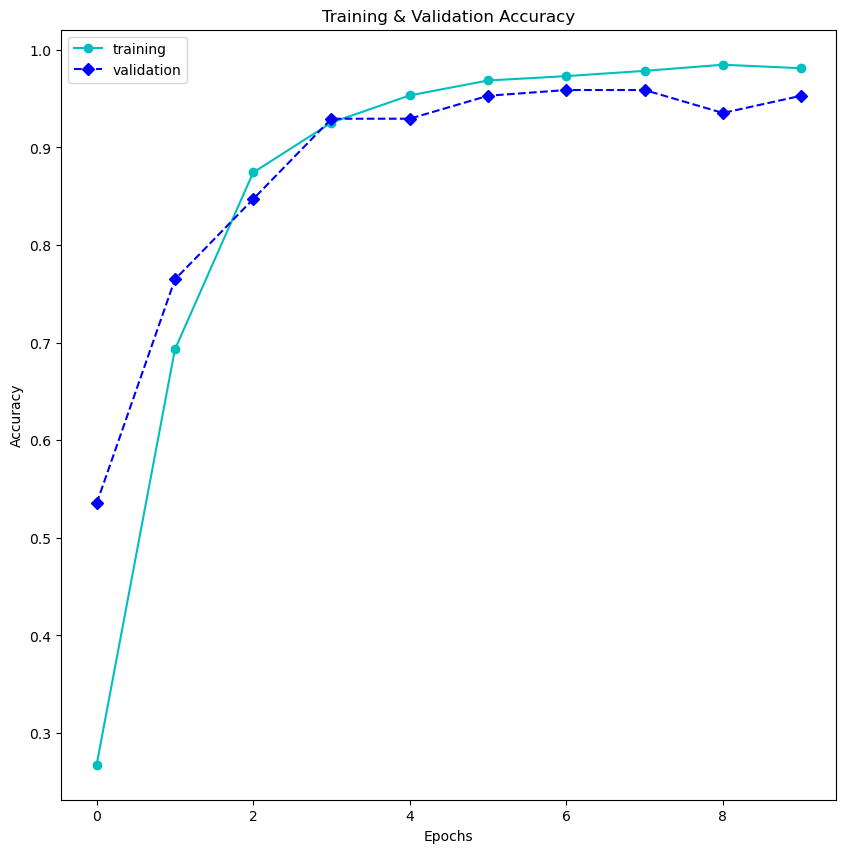

In [26]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

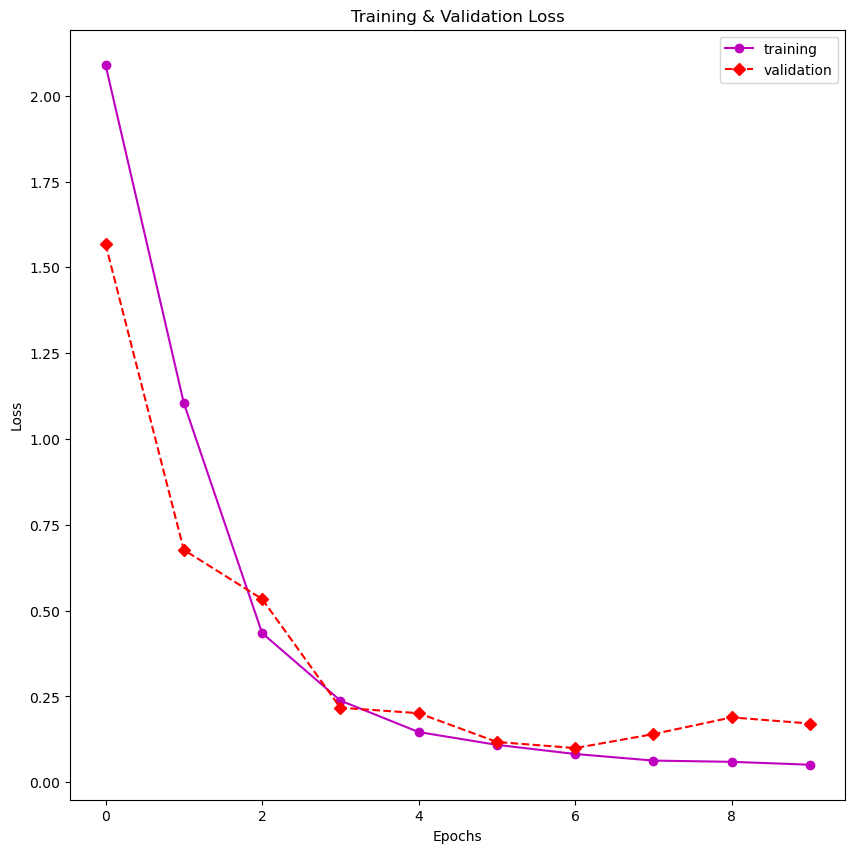

In [27]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluate Model
## To test the model using testing data

In [28]:
test_evaluate = model.evaluate(test_generator, verbose=0, batch_size=64)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.1800355315208435
Test accuracy : 0.95


# Visualization of the correct prediction result

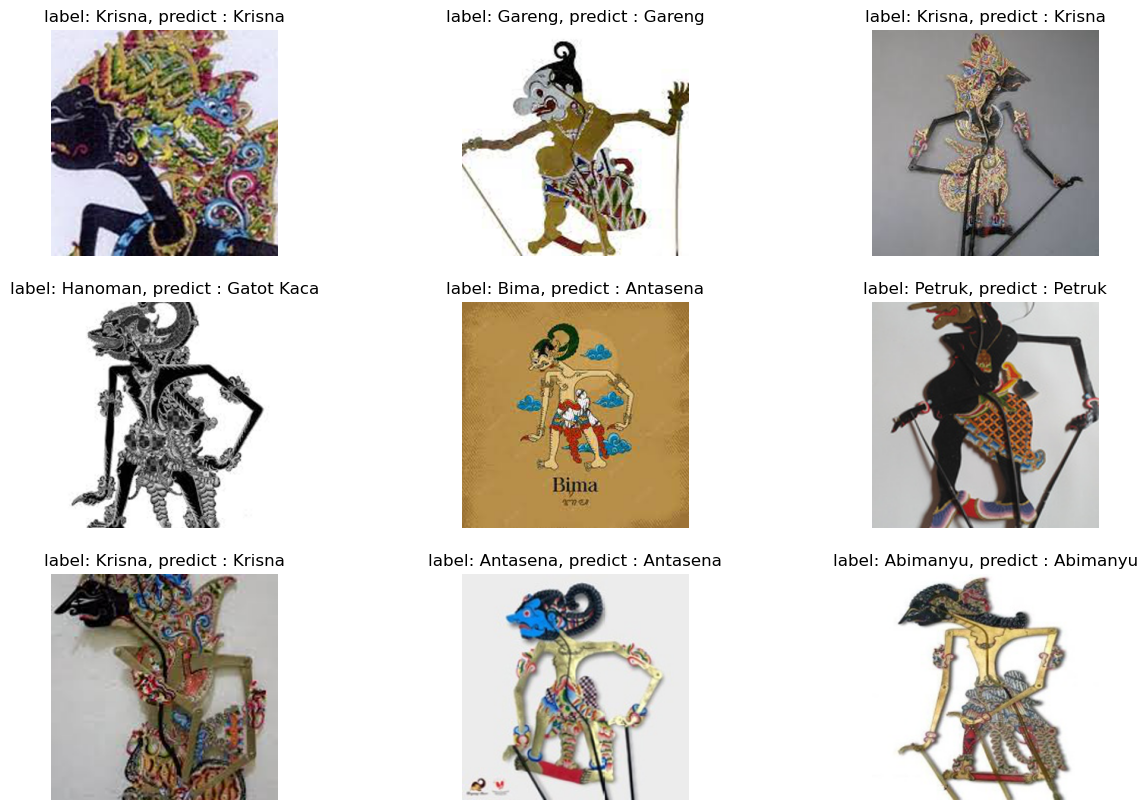

In [29]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')

# Visualization of wrong prediction results

IndexError: index 64 is out of bounds for axis 0 with size 64

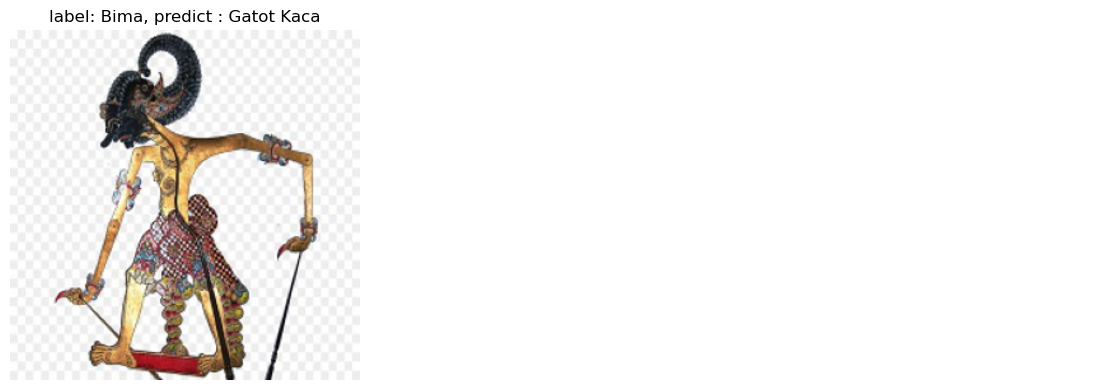

In [30]:
#Plot prediction Error
image ,label = next(iter(test_generator))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,2,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')
        j+=1
    i+=1

# Convusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_test = []
y_pred = []

for i in range(len(test_generator)) :
    x,y = test_generator.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

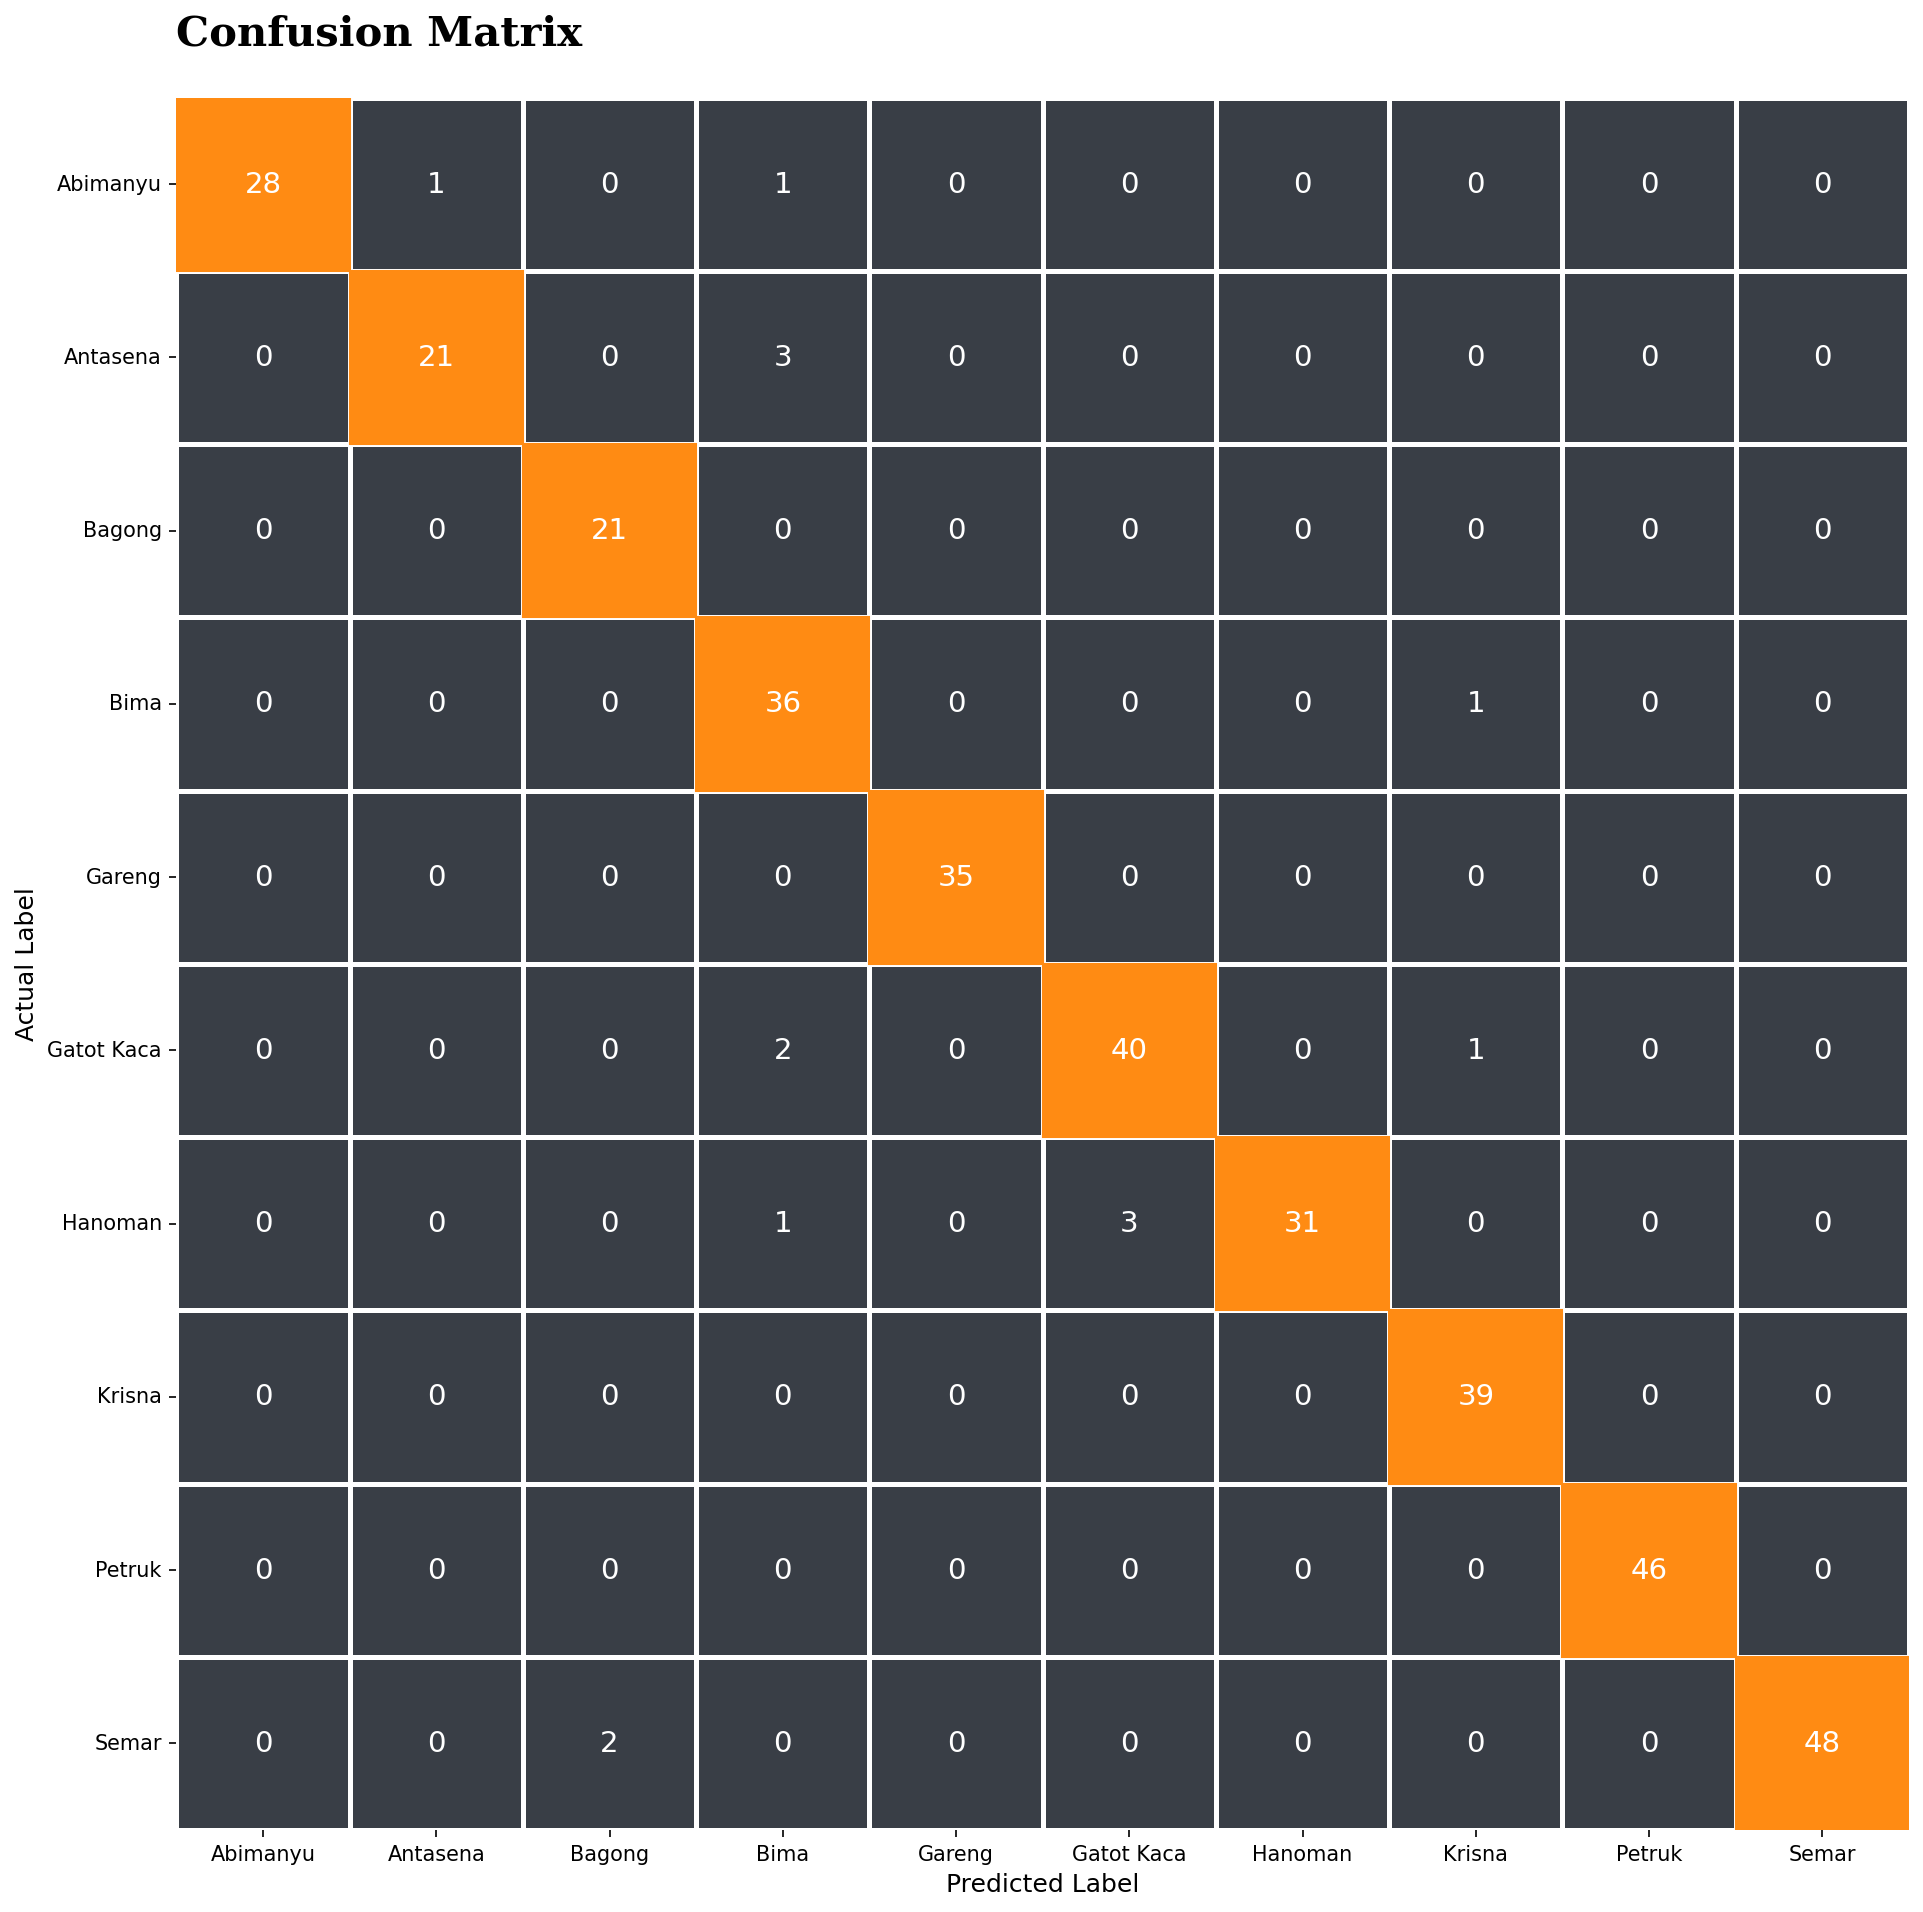

In [33]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 15),dpi=150)
cm = confusion_matrix(y_test, y_pred)

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


ax.text(0,-0.3,'Confusion Matrix ',fontfamily='serif',fontsize=20,fontweight='bold')
sns.heatmap(ax=ax, data=cm,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=1.5, annot=True,cmap=colormap, 
            annot_kws={"fontsize":14},fmt='')
ax.set_xticklabels(['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar'])
ax.set_yticklabels(['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar'])
plt.yticks(rotation=0)

ax.set_ylabel("Actual Label",fontsize=12)
ax.set_xlabel("Predicted Label",fontsize=12)

from matplotlib.patches import Rectangle
for i in range(0,10):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=True,color="#FF8B13"))

plt.show()

The **orange box** showed the amount of correct prediction of each label

# Classification Report

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [35]:
import pandas as pd

In [36]:
precission = precision_score(y_test, y_pred, pos_label='positive', average='micro')
recall = recall_score(y_test, y_pred, pos_label='positive', average='micro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='micro')
accuracy = accuracy_score(y_test, y_pred)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [37]:
df_classification = pd.DataFrame(
    {
        "Accuracy"  : [accuracy],
        "Precision" : [precission],
        "Recall"    : [recall],
        "f1_score"  : [f1]
    },
    index = ["RGB"]
)

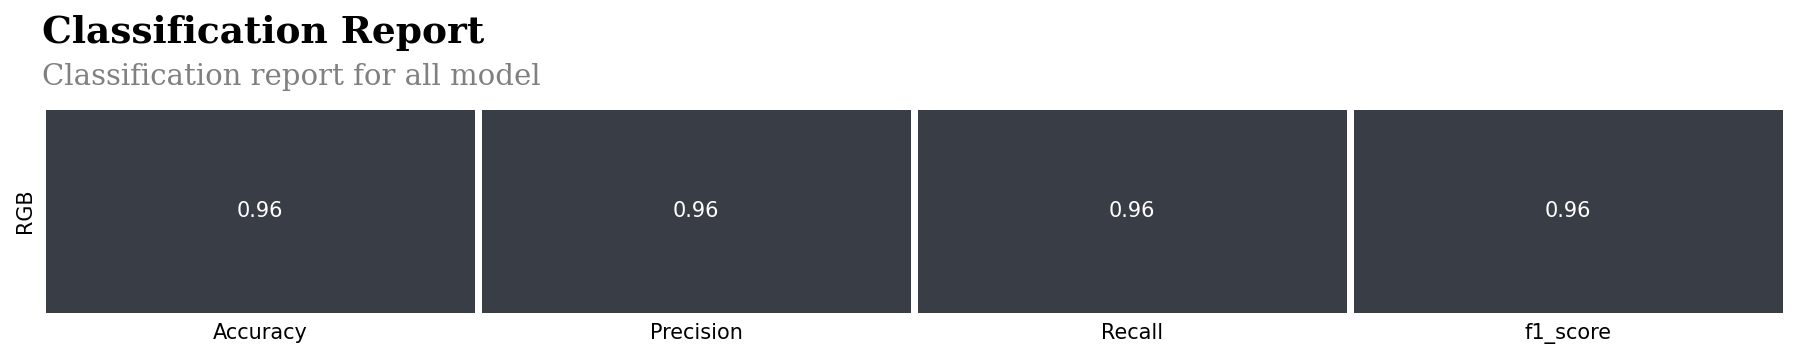

In [38]:
fig = plt.figure(figsize=(15,10), dpi=150)
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(df_classification, cmap=colormap,annot=True,fmt=".2f", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-0.30,'Classification Report',fontfamily='serif',fontsize=18,fontweight='bold')
ax0.text(0,-0.10,'Classification report for all model',fontfamily='serif',fontsize=14,fontweight='light',color='gray')


rect = ax0.add_patch(Rectangle((0, 1), 4, 1, fill=True,color="#FF8B13",lw=0,alpha=0.8))

plt.show()

In [39]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Abimanyu       1.00      0.93      0.97        30
    Antasena       0.95      0.88      0.91        24
      Bagong       0.91      1.00      0.95        21
        Bima       0.84      0.97      0.90        37
      Gareng       1.00      1.00      1.00        35
  Gatot Kaca       0.93      0.93      0.93        43
     Hanoman       1.00      0.89      0.94        35
      Krisna       0.95      1.00      0.97        39
      Petruk       1.00      1.00      1.00        46
       Semar       1.00      0.96      0.98        50

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

